# Introduction

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

<b>The client with payment difficulties</b> : he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

<b>All other cases </b> : All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

<b>Approved</b> : The Company has approved loan Application

<b>Cancelled</b> : The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

<b>Refused</b> : The company had rejected the loan (because the client does not meet their requirements etc.).

<b>Unused offer</b> : Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [428]:
#Import Required packages for EDA
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to suppress warnings
import warnings   
warnings.filterwarnings("ignore")

### Loading the Datasets

In [429]:
#Reading the dataset
curr_appl=pd.read_csv('D:\\Case_Study\\application_data.csv')
prev_appl=pd.read_csv('D:\\Case_Study\\previous_application.csv')

#### First we will start with analysis of the Application dataset.

In [430]:
#Getting small preview of of application dataset
pd.set_option("display.max_columns", None)
curr_appl.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [431]:
#getting the shape of application_data
curr_appl.shape

(307511, 122)

In [432]:
#Next we will try to get to know what type of dataset we are dealing with
curr_appl.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

There are 122 fields in the dataset

### Cleaning the dataset

<b>Next we will try to clean the Null values and try to narrow down the columns which we will look upon.</b> 

In [433]:
#Calculating % of null values
null_calc=(curr_appl.isnull().sum()/len(curr_appl)*100).sort_values(ascending=False)
null_calc

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

We can see that there are some columns which have presence of null value as high as ~70 % we can assume that it is safe to drop from the dataset as getting definite inference from them will be quite tricky.
So next we will try to drop these columns which have null value presence more than 30%

In [434]:
#Getting columns name having Null value presence >30%
drop_col=[]
drop_col.append(null_calc[null_calc>=30].index)
print("Number of columns to be dropped is :",len(drop_col[0]))
print(drop_col[0])

Number of columns to be dropped is : 50
Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOOR

We can see that most of the columns are related to the information about the living apartment information . It can be observed that getting each and every info like getting area coverage average and Years build is not that feasible . 

In [435]:
#Removing the columns as got from above
curr_appl.drop(labels=drop_col[0],axis=1,inplace=True)

In [436]:
#Checking rest of null values
null_calc1=(curr_appl.isnull().sum()/len(curr_appl)*100).sort_values(ascending=False)
null_calc1.head(10)

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
dtype: float64

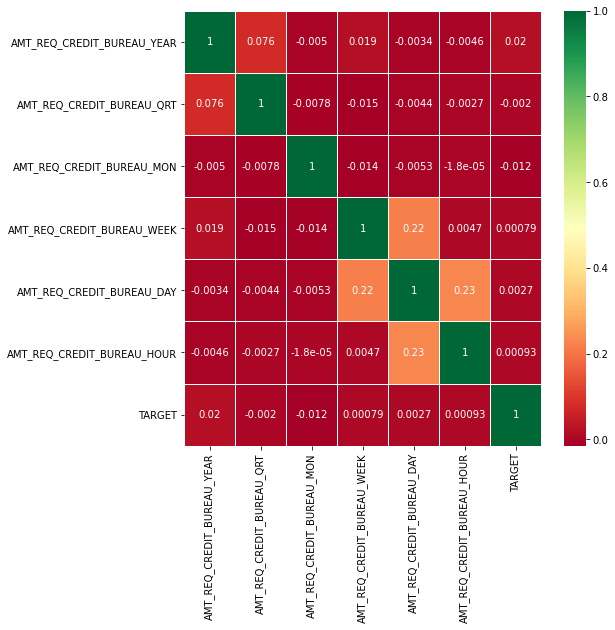

In [437]:
#Checking Correlation between target and about AMT Labels
Req_Credit=['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']
Req_Credit1=Req_Credit.copy()
Req_Credit1.append('TARGET')
Req_corr = curr_appl[Req_Credit1].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Req_corr,
            xticklabels=Req_corr.columns,
            yticklabels=Req_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

Columns having value greater then 10% were removed as we can see from heatmap they have negative correlation with <b>TARGET</b> Label which is main feature of dataset.

In [438]:
#Dropping the column
drop_col1=[]
drop_col1.append(null_calc1[null_calc1>=10].index)
print("Number of columns to be dropped is :",len(drop_col1[0]))
print(drop_col1[0])

Number of columns to be dropped is : 7
Index(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_HOUR'],
      dtype='object')


In [439]:
#Dropping the columns
curr_appl.drop(labels=drop_col1[0],axis=1,inplace=True)

Next we are checking the <b>way of commincation</b> columns and see how they are correlated to <b>TARGET</b> label or not

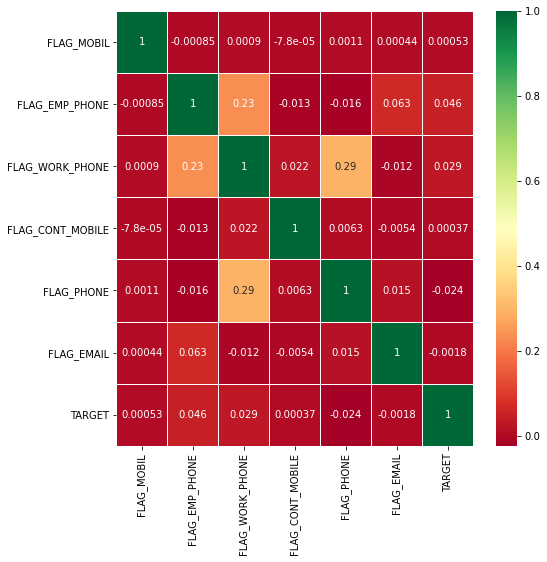

In [440]:
#Checking Correlation between target and about Communication realted Labels
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL']
contact_col1= contact_col.copy()
contact_col1.append('TARGET')
Contact_corr = curr_appl[contact_col1].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

As we can see here also the correlation factor is not that exciting that we can consider it for our analysis hence we decide to drop it.

In [441]:
#Dropping the Contact columns
curr_appl.drop(labels=contact_col,axis=1,inplace=True)

Next we will check the dependence of Flags related to document and correlation with <b>TARGET</b> label.

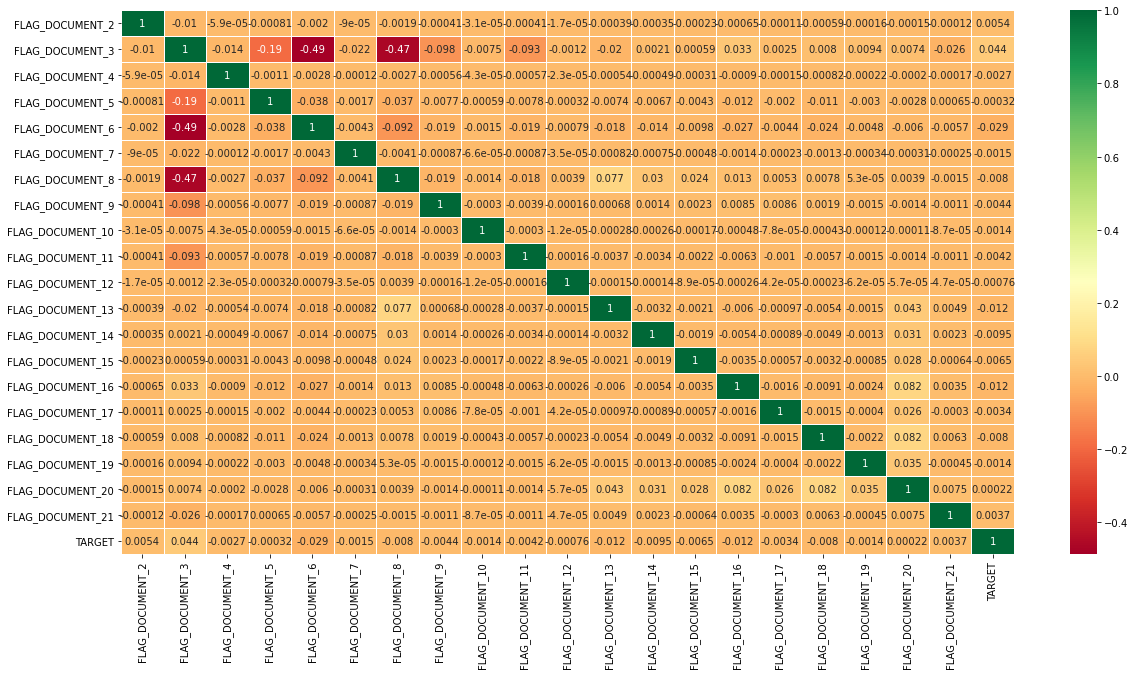

<Figure size 576x576 with 0 Axes>

In [442]:
#Getting document relevant labels and add it in a list and check correlation
doc=[]
fig, ax = plt.subplots(figsize=(20,10)) 
for i in range(2,22):
    doc.append("FLAG_DOCUMENT_"+str(i))
doc1=doc.copy()
doc1.append('TARGET')
Flag_corr = curr_appl[doc1].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Flag_corr,
            xticklabels=Flag_corr.columns,
            yticklabels=Flag_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1,ax=ax)

The Document columns are also not that much correlated to the <b>TARGET</b> label hence this can also be removed.

In [443]:
#Removing the document columns
curr_appl.drop(labels=doc,axis=1,inplace=True)

In [444]:
#Based on analysis there are some other columns decided to be removed
curr_appl.drop(labels=['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','DAYS_LAST_PHONE_CHANGE'],axis=1,inplace=True)

Finally we decided to impute the other important columns Null values with proper values.

In [445]:
#Filling NA Values
value=(curr_appl['AMT_ANNUITY'].median())
value_cnt=(curr_appl['CNT_FAM_MEMBERS'].median())
value_amt=(curr_appl['CNT_FAM_MEMBERS'].median())
curr_appl['AMT_ANNUITY']=curr_appl['AMT_ANNUITY'].fillna(value)
curr_appl['CNT_FAM_MEMBERS']=curr_appl['CNT_FAM_MEMBERS'].fillna(value_cnt)
curr_appl['AMT_GOODS_PRICE']=curr_appl['AMT_GOODS_PRICE'].fillna(value_amt)
curr_appl['NAME_TYPE_SUITE']=curr_appl['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [446]:
#Now will check if there is any Null Values
(curr_appl.isnull().sum()/len(curr_appl)*100).sort_values(ascending=False)

SK_ID_CURR                     0.0
DAYS_BIRTH                     0.0
LIVE_CITY_NOT_WORK_CITY        0.0
REG_CITY_NOT_WORK_CITY         0.0
REG_CITY_NOT_LIVE_CITY         0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_REGION_NOT_WORK_REGION     0.0
REG_REGION_NOT_LIVE_REGION     0.0
HOUR_APPR_PROCESS_START        0.0
WEEKDAY_APPR_PROCESS_START     0.0
REGION_RATING_CLIENT_W_CITY    0.0
REGION_RATING_CLIENT           0.0
CNT_FAM_MEMBERS                0.0
DAYS_ID_PUBLISH                0.0
DAYS_REGISTRATION              0.0
DAYS_EMPLOYED                  0.0
REGION_POPULATION_RELATIVE     0.0
TARGET                         0.0
NAME_HOUSING_TYPE              0.0
NAME_FAMILY_STATUS             0.0
NAME_EDUCATION_TYPE            0.0
NAME_INCOME_TYPE               0.0
NAME_TYPE_SUITE                0.0
AMT_GOODS_PRICE                0.0
AMT_ANNUITY                    0.0
AMT_CREDIT                     0.0
AMT_INCOME_TOTAL               0.0
CNT_CHILDREN                   0.0
FLAG_OWN_REALTY     

##### Great ! Now we have no Null data now we can move on to next step of data analysis.

### Manipulating the data

In [447]:
#First we will have a preview of the dataset
curr_appl.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School


First we will try to convert the Datafames with boolean values ("M" or "F") or ("Y" or "N") to values (1,0) to get better usage for analysis , so :

If Gender is <b>M</b> or if categorical value is <b>Y</b> then value assigned is 1

If Gender is <b>F</b> or if categorical value is <b>N</b> then value assigned is 0

In [448]:
#Applying the changes in different columns
curr_appl['CODE_GENDER']=curr_appl['CODE_GENDER'].apply(lambda x: 1 if x=='M' else 0)
curr_appl['FLAG_OWN_CAR']=curr_appl['FLAG_OWN_CAR'].apply(lambda x: 1 if x=='Y' else 0)
curr_appl['FLAG_OWN_REALTY']=curr_appl['FLAG_OWN_REALTY'].apply(lambda x: 1 if x=='Y' else 0)

In [449]:
#Next we will convert the Birth and days employed to Year so that data becomes more asthetic
curr_appl['DAYS_BIRTH']=curr_appl['DAYS_BIRTH'].apply(lambda x:int(abs(x)/365))
curr_appl['DAYS_EMPLOYED']=curr_appl['DAYS_EMPLOYED'].apply(lambda x:int(abs(x)/365))

In [450]:
curr_appl.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,1,0,1,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,-3648.0,-2120,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,-1186.0,-291,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,1,1,1,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,0,-4260.0,-2531,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,0,0,1,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,8,-9833.0,-2437,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,1,0,1,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,8,-4311.0,-3458,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion


### Analysis of Data

In [451]:
#To get some some info about statistical data
curr_appl.describe()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.341643,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.379095e+05,0.020868,43.435968,185.021521,-4986.120328,-2994.202373,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,102790.175348,0.272419,0.474261,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.696338e+05,0.013831,11.954593,381.972190,3522.886321,1509.450419,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,2.000000e+00,0.000290,20.000000,0.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,34.000000,2.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,43.000000,6.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,53.000000,15.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,69.000000,1000.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


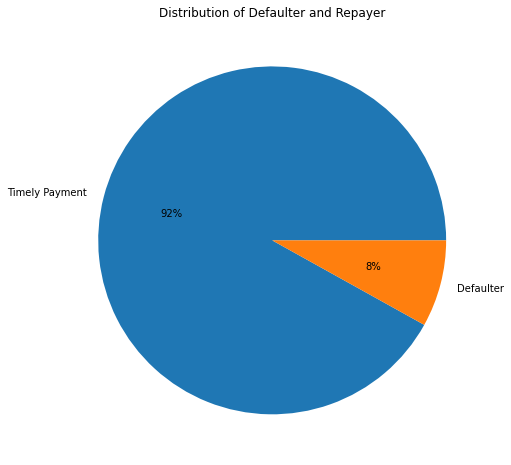

In [452]:
#We will try to visualize to see how target label is distributed
fig = plt.subplots(figsize=(8,8))
plt.pie(curr_appl.TARGET.value_counts(),labels=['Timely Payment','Defaulter'],autopct='%1.00f%%')
plt.title('Distribution of Defaulter and Repayer')
plt.show()

#### So we can see that from the dataset approximately ~92% people are paying timely , Very few people are making untimely repayment.

##### Next we will see how many type loan are being provided

In [453]:
#get the number of unique values for contract type
curr_appl.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

A <b>Cash Loan</b> is a loan which is received by the borrower in cash. This sets it apart from overdraft loans, installment loans and leases. Cash loans may be given to a private individual as a personal loan or to a business as a business loan.

A <b>Revolving Loan</b> facility is a form of credit issued by a financial institution that provides the borrower with the ability to draw down or withdraw, repay, and withdraw again. A revolving loan is considered a flexible financing tool due to its repayment and re-borrowing accommodations.

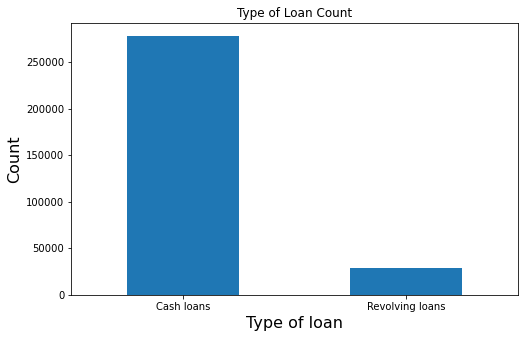

In [454]:
#check what type of loan is taken more often
plt.figure(figsize=(8,5))
curr_appl.NAME_CONTRACT_TYPE.value_counts().plot(kind='bar',title='Type of Loan Count')
plt.xlabel('Type of loan',size=16)
plt.ylabel('Count',size=16)
plt.xticks(rotation=0)
plt.show()

###### We can see that there is a huge variation type of loan people prefer as more then 70% people prefer taking Cash Loan over Revolving Loan . So we can say that Cash Loan is the most used product.

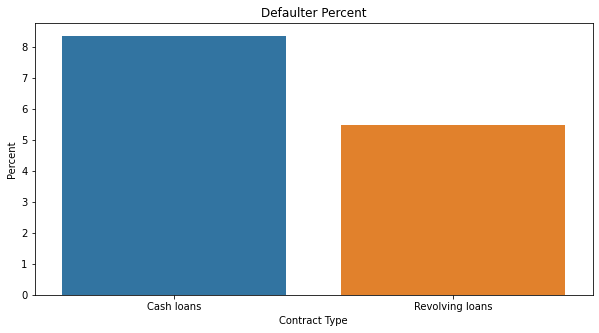

In [455]:
#plot to check the 
plt.figure(figsize=(10,5))
plot_data=curr_appl[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
sns.barplot(x='NAME_CONTRACT_TYPE',y='TARGET',data=plot_data)
plt.title('Defaulter Percent')
plt.xlabel('Contract Type')
plt.ylabel('Percent')
plt.show()

###### Cash loan have higer % of Defaulter compared to Revolving Loans

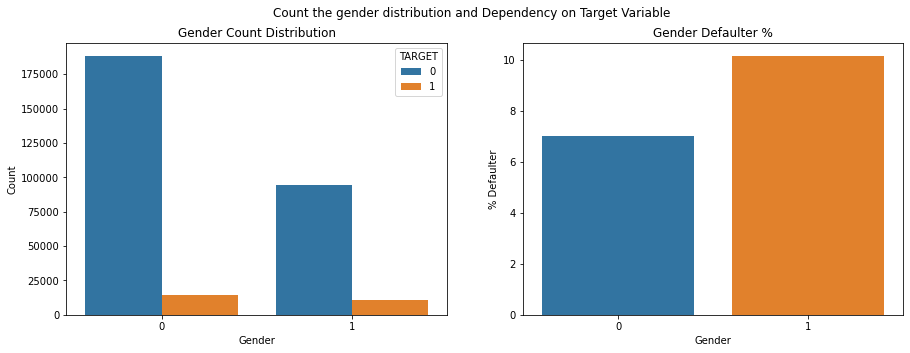

In [456]:
#Plot for the dependecies on Gender
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Count the gender distribution and Dependency on Target Variable')
sns.countplot(ax=axes[0],data=curr_appl,x='CODE_GENDER',hue='TARGET')
axes[0].set_title('Gender Count Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
plot_data=curr_appl[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
sns.barplot(ax=axes[1],x='CODE_GENDER',y='TARGET',data=plot_data)
axes[1].set_title('Gender Defaulter %')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('% Defaulter')
plt.show()

###### We can see that the Males are more tending to be a defaulter than Female

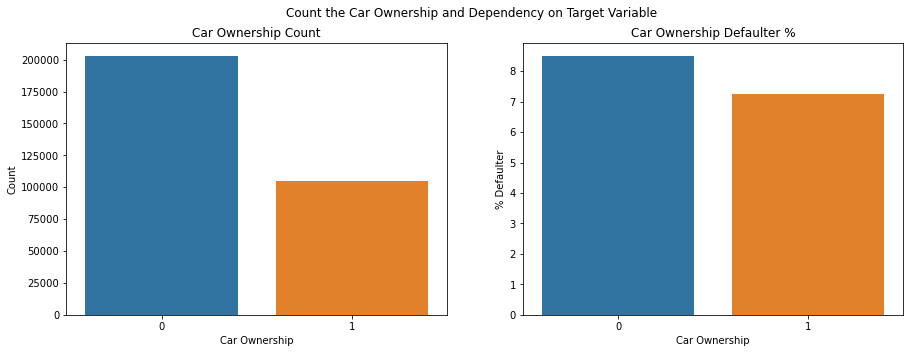

In [457]:
#Plot for the dependecies on Car Ownership
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Count the Car Ownership and Dependency on Target Variable')
sns.countplot(ax=axes[0],data=curr_appl,x='FLAG_OWN_CAR')
axes[0].set_title('Car Ownership Count')
axes[0].set_xlabel('Car Ownership')
axes[0].set_ylabel('Count')
plot_data=curr_appl[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
sns.barplot(ax=axes[1],x='FLAG_OWN_CAR',y='TARGET',data=plot_data)
axes[1].set_title('Car Ownership Defaulter %')
axes[1].set_xlabel('Car Ownership')
axes[1].set_ylabel('% Defaulter')
plt.show()

###### We can infer that many dont have a car but in % of defaulter they are approximately the same range .

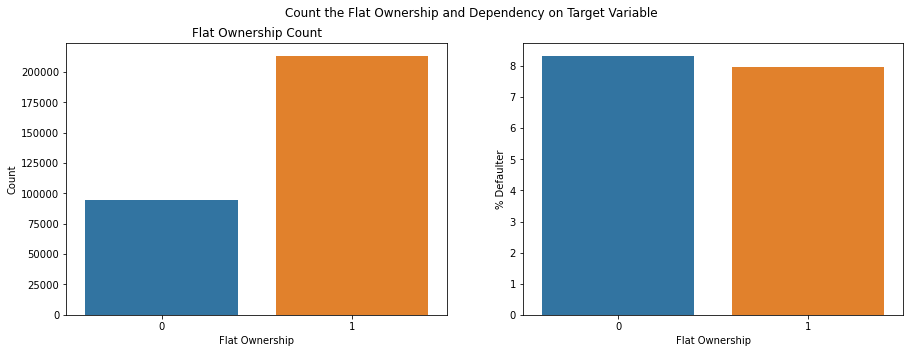

In [458]:
#Plot for the dependecies on Flat Ownership
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Count the Flat Ownership and Dependency on Target Variable')
sns.countplot(ax=axes[0],data=curr_appl,x='FLAG_OWN_REALTY')
axes[0].set_title('Flat Ownership Count')
axes[0].set_xlabel('Flat Ownership')
axes[0].set_ylabel('Count')
plot_data=curr_appl[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
sns.barplot(ax=axes[1],x='FLAG_OWN_REALTY',y='TARGET',data=plot_data)
axes[1].set_xlabel('Flat Ownership')
axes[1].set_ylabel('% Defaulter')
plt.show()

###### The Flag Ownership criteria plays a role as there are huge number of people having flat and want to take loan , this can infered that people maybe take loan maybe for house, and we can see that people having flat or not the defaulter % is almost same.

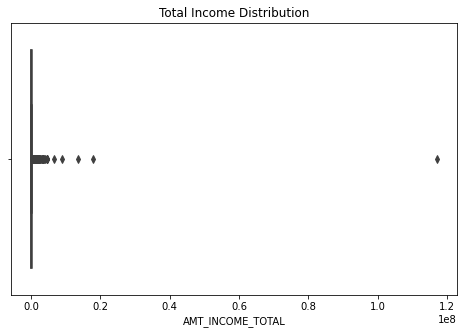

In [459]:
#Boxplot for Total Income
plt.figure(figsize=(8,5))
sns.boxplot(curr_appl.AMT_INCOME_TOTAL).set(title='Total Income Distribution')
plt.show()

In [460]:
#Getting to know the distribution of Total Income
curr_appl["AMT_INCOME_TOTAL"].quantile([0.25,0.50,0.75,0.90,1])

0.25       112500.0
0.50       147150.0
0.75       202500.0
0.90       270000.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

###### With this above plot we can see that the Income is spread across within a range also there are lot outliners also and we can notice one being too far .

###### We can see a value which is in order of 1Cr which we cannot consider as outliner as it is possible that someone has very huge salary , Almost 90% of people who apply for loan have salary of less then 3Lacs

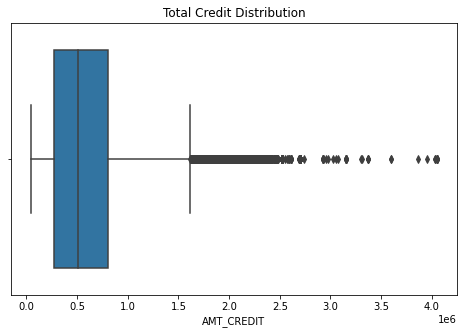

In [461]:
#Boxplot for Total Income
plt.figure(figsize=(8,5))
sns.boxplot(curr_appl.AMT_CREDIT).set(title='Total Credit Distribution')
plt.show()

###### With this above plot we can see that the Credit taken is spread across within a range with huge number of outliners.

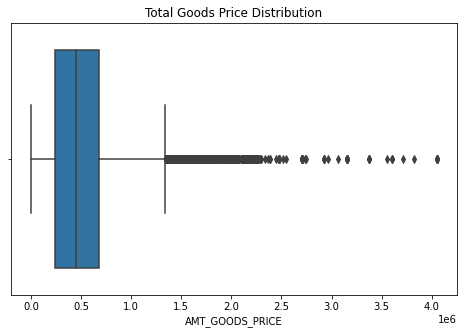

In [462]:
#Boxplot for Total Income
plt.figure(figsize=(8,5))
sns.boxplot(curr_appl.AMT_GOODS_PRICE).set(title='Total Goods Price Distribution')
plt.show()

###### With this above plot we can see that the Goods Price is spread across within a range with huge number of outliners.

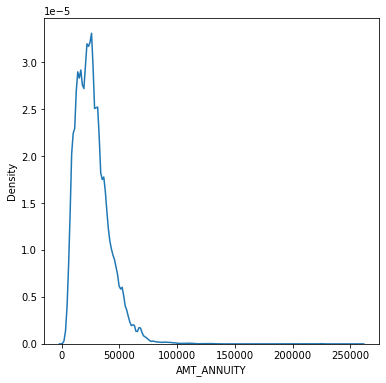

In [463]:
plt.figure(figsize=(6,6))
sns.kdeplot(curr_appl['AMT_ANNUITY'])
plt.show()

#### This indicates that the Annuity amount is highly skewed data.

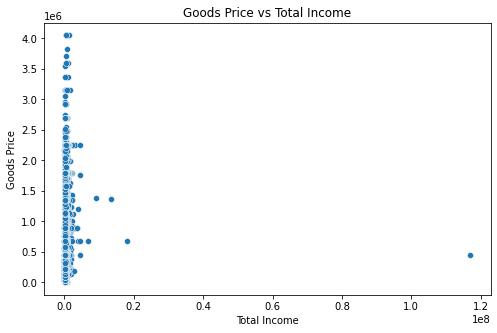

In [464]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=curr_appl, x="AMT_INCOME_TOTAL", y="AMT_GOODS_PRICE")
plt.title('Goods Price vs Total Income')
plt.xlabel('Total Income')
plt.ylabel('Goods Price')
plt.show()

###### We can see that there is no proper relationship between total income and goods price as people with low salary are also applying for loan for very high goods price which can lead them to be a defaulter also.

In [465]:
#Creating a Function to distribute the application based on income
#The distribution was selected based one the percentile data we got earlier
def income_range(x):
    if(x <=150000):
        return ("LOWER CLASS")
    elif (x <= 300000 and x > 150000):
        return ("MIDDLE CLASS")
    elif (x <= 500000 and x > 300000):
        return ("UPPER-MID CLASS")
    else:
        return ("UPPER CLASS")

In [466]:
#Applying Function to create a new column
curr_appl['PEOPLE_CLASS']=curr_appl["AMT_INCOME_TOTAL"].apply(income_range)

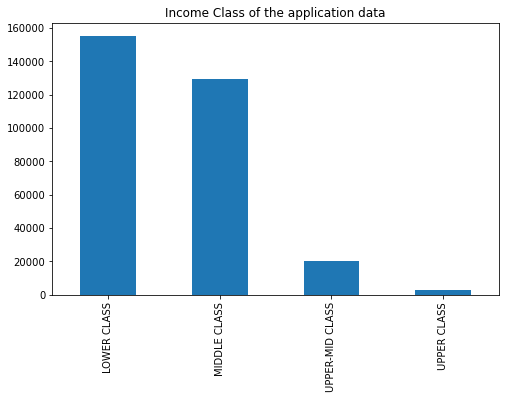

In [467]:
#check the application distribution based on class
plt.figure(figsize=(8,5))
curr_appl.PEOPLE_CLASS.value_counts().plot(kind='bar',title='Income Class of the application data')
plt.show()

###### The Lower class people are the mostly need of loan followed by Middle class then a sharp decrease for Upper-Middle Class

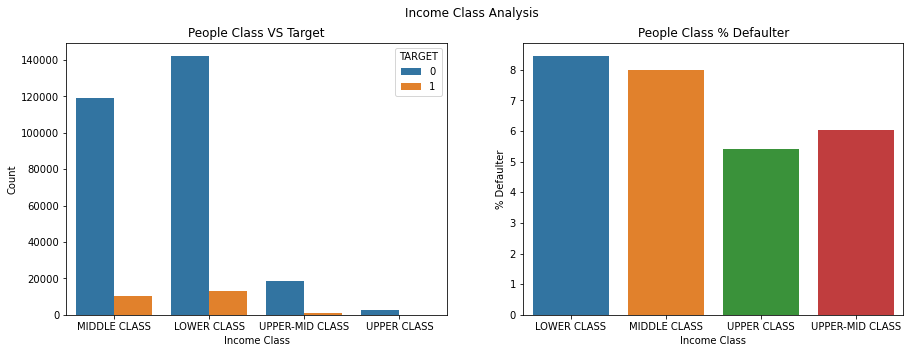

In [468]:
#Plot for the dependecies on Flat Ownership
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Income Class Analysis')
sns.countplot(ax=axes[0],data=curr_appl,x='PEOPLE_CLASS',hue='TARGET')
axes[0].set_title('People Class VS Target')
axes[0].set_xlabel('Income Class')
axes[0].set_ylabel('Count')
plot_data=curr_appl[['PEOPLE_CLASS','TARGET']].groupby(['PEOPLE_CLASS'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
sns.barplot(ax=axes[1],x='PEOPLE_CLASS',y='TARGET',data=plot_data)
axes[1].set_title('People Class % Defaulter')
axes[1].set_xlabel('Income Class')
axes[1].set_ylabel('% Defaulter')
plt.show()

###### From the above plot we get following inference that Lower and Middle Class Category have higher chance to be Defaulter

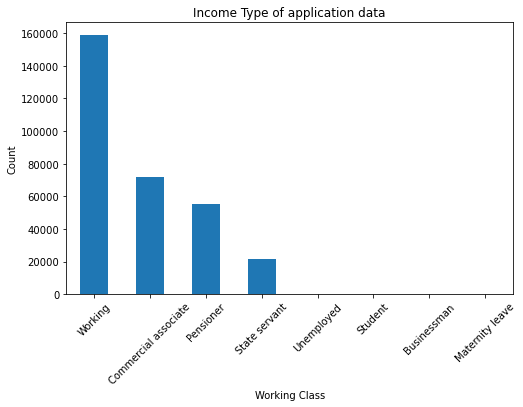

In [469]:
#Will now move to Income Type
plt.figure(figsize=(8,5))
curr_appl.NAME_INCOME_TYPE.value_counts().plot(kind='bar',title='Income Type of application data')
plt.xlabel('Working Class')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

###### Most of people applying for loan are Working Class People

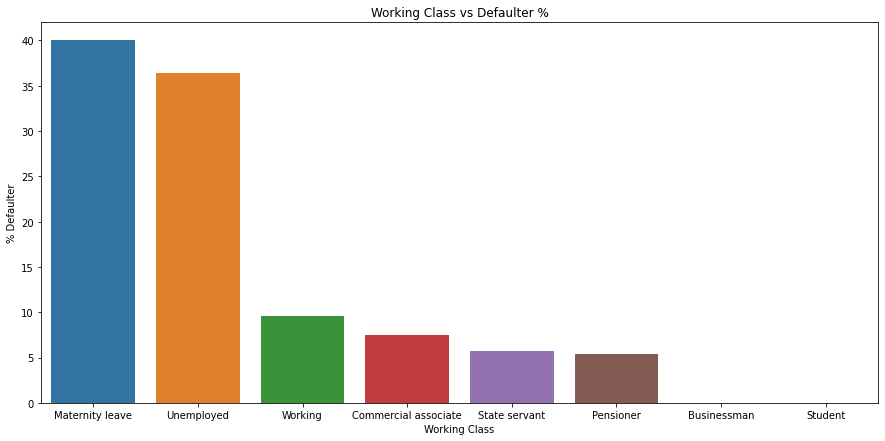

In [470]:
#Plot to see which working class have highest salary and propertion
plt.figure(figsize=(15,7))
plot_data=curr_appl[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
sns.barplot(x='NAME_INCOME_TYPE',y='TARGET',data=plot_data)
plt.title("Working Class vs Defaulter %")
plt.xlabel('Working Class')
plt.ylabel('% Defaulter')
plt.show()

###### Maternity Leave and Unemployed Class have higher chance to be defaulter and Student and Businessman payback timely

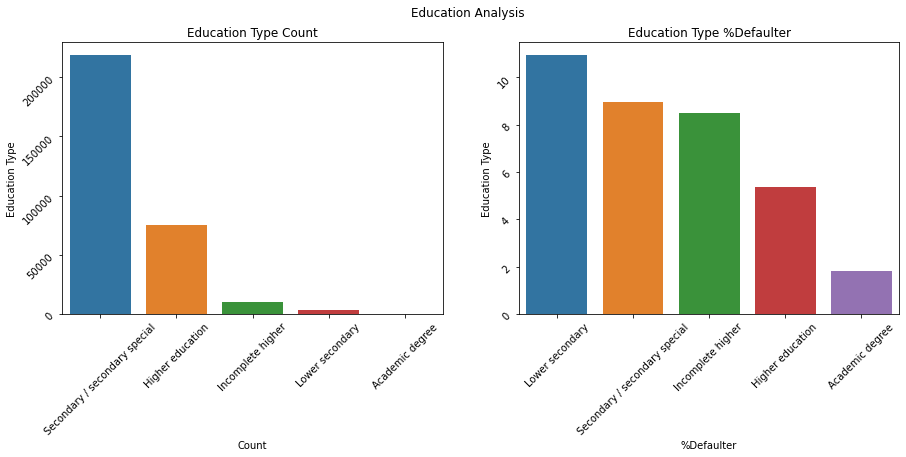

In [471]:
#Plot for the dependecies on Education
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Education Analysis')
sns.countplot(ax=axes[0],data=curr_appl,x='NAME_EDUCATION_TYPE')
axes[0].set_title('Education Type Count')
axes[0].set_ylabel('Education Type')
axes[0].set_xlabel('Count')
axes[0].tick_params(labelrotation=45)
plot_data=curr_appl[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
sns.barplot(ax=axes[1],x='NAME_EDUCATION_TYPE',y='TARGET',data=plot_data)
axes[1].set_title('Education Type %Defaulter')
axes[1].set_ylabel('Education Type')
axes[1].set_xlabel('%Defaulter')
axes[1].tick_params(labelrotation=45)
plt.show()

###### Acedemic Degree People have higher chance to be Timely Repayer and Lower secondary the highest chance to default

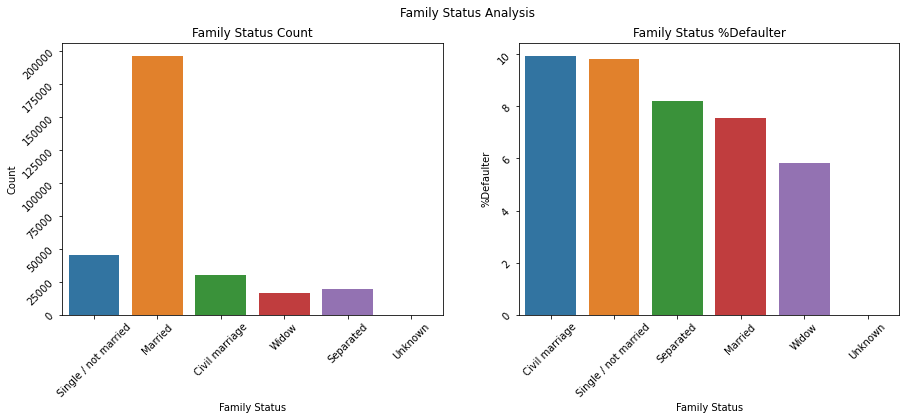

In [472]:
#Plot for Family Status
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Family Status Analysis')
sns.countplot(ax=axes[0],data=curr_appl,x='NAME_FAMILY_STATUS')
axes[0].set_title('Family Status Count')
axes[0].set_xlabel('Family Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(labelrotation=45)
plot_data=curr_appl[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
sns.barplot(ax=axes[1],x='NAME_FAMILY_STATUS',y='TARGET',data=plot_data)
axes[1].set_title('Family Status %Defaulter')
axes[1].set_xlabel('Family Status')
axes[1].set_ylabel('%Defaulter')
axes[1].tick_params(labelrotation=45)
plt.show()

###### Married Person have highest number of loan applier but have considerably high defaulter rate , Unknown have lowest Defaulter rate

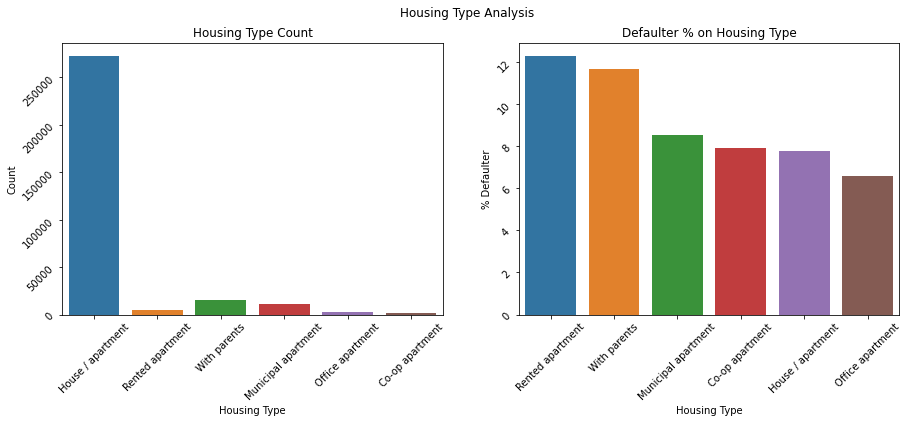

In [473]:
#Plot for Housing Type Status
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Housing Type Analysis')
sns.countplot(ax=axes[0],data=curr_appl,x='NAME_HOUSING_TYPE')
axes[0].set_title('Housing Type Count')
axes[0].set_xlabel('Housing Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(labelrotation=45)
plot_data=curr_appl[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
sns.barplot(ax=axes[1],x='NAME_HOUSING_TYPE',y='TARGET',data=plot_data)
axes[1].set_title('Defaulter % on Housing Type')
axes[1].set_xlabel('Housing Type')
axes[1].set_ylabel('% Defaulter')
axes[1].tick_params(labelrotation=45)
plt.show()

###### Rented Apartment have highest default rate but House/Apartment have highest loan application

In [474]:
#Count the organization type in the dataset
curr_appl.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

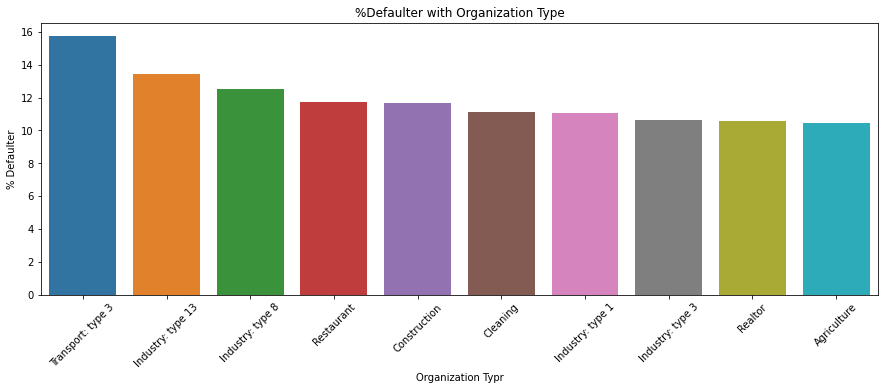

In [475]:
plt.figure(figsize=(15,5))
plot_data=curr_appl[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
plot_data=plot_data.iloc[0:10]
sns.barplot(x='ORGANIZATION_TYPE',y='TARGET',data=plot_data)
plt.title('%Defaulter with Organization Type')
plt.xlabel('Organization Typr')
plt.ylabel('% Defaulter')
plt.xticks(rotation=45)
plt.show()

###### The Transport Type 3 have the highest defaulter rate

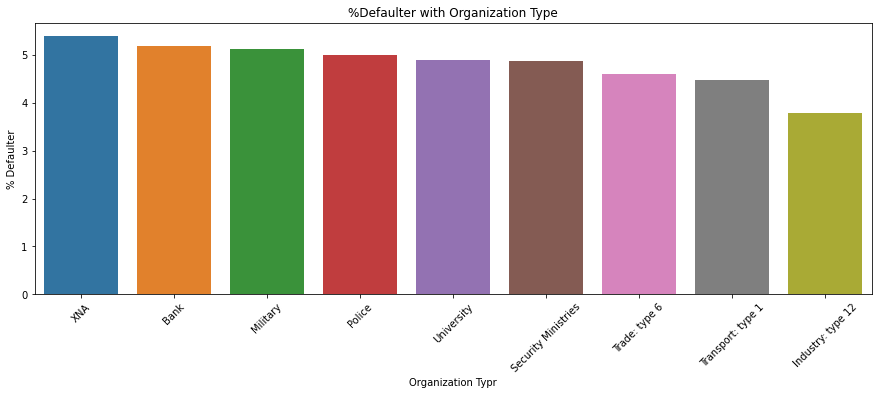

In [476]:
plt.figure(figsize=(15,5))
plot_data=curr_appl[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
plot_data=plot_data.iloc[-10:-1]
sns.barplot(x='ORGANIZATION_TYPE',y='TARGET',data=plot_data)
plt.title('%Defaulter with Organization Type')
plt.xlabel('Organization Typr')
plt.ylabel('% Defaulter')
plt.xticks(rotation=45)
plt.show()

###### The XNA and Bank have the lowest defaulter rate

##### Now we will check the relation between loan amount taken and the income of individual which is found by ratio of AMT_CREDIT with AMT_INCOME_TOTAL

##### More the Ratio More the Loan Amount asked by Applicant which can be a interesting parameter to check

In [477]:
#Creating Credit Ratio
curr_appl['INCOME_CREDIT']=curr_appl['AMT_CREDIT']/curr_appl['AMT_INCOME_TOTAL']

In [478]:
#Distribution of Credit Ration
curr_appl['INCOME_CREDIT'].describe()

count    307511.000000
mean          3.957570
std           2.689728
min           0.004808
25%           2.018667
50%           3.265067
75%           5.159880
max          84.736842
Name: INCOME_CREDIT, dtype: float64

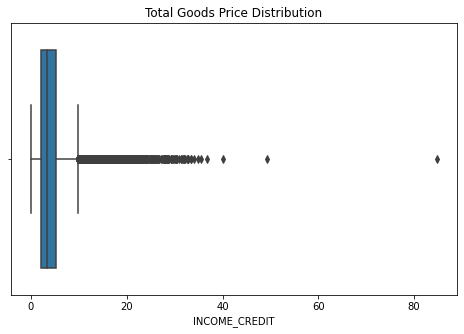

In [479]:
#Boxplot for Income Credit
plt.figure(figsize=(8,5))
sns.boxplot(curr_appl.INCOME_CREDIT).set(title='Total Goods Price Distribution')
plt.show()

###### There are huge number of outliners in the data and we can see that there are many >20 which seems a little risky if we approve the loan

In [480]:
#Based on the credit score calculated we will now split it
def credit_range(x):
    if(x <=5):
        return ("LOW")
    elif x <= 20 and x > 5:
        return ("MID")
    else:
        return ("UPPER")

In [481]:
#Apply to dataframe
curr_appl['CREDIT_CLASS']=curr_appl["INCOME_CREDIT"].apply(credit_range)

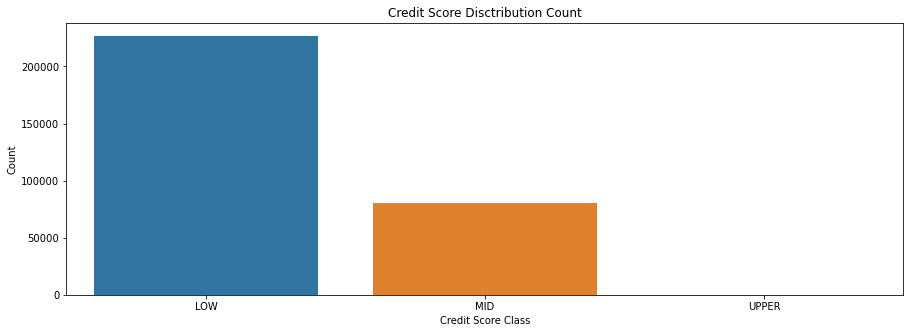

In [482]:
#Count of Credit Score
plt.figure(figsize=(15,5))
sns.countplot(data=curr_appl,x='CREDIT_CLASS')
plt.xlabel('Credit Score Class')
plt.ylabel('Count')
plt.title('Credit Score Disctribution Count')
plt.show()

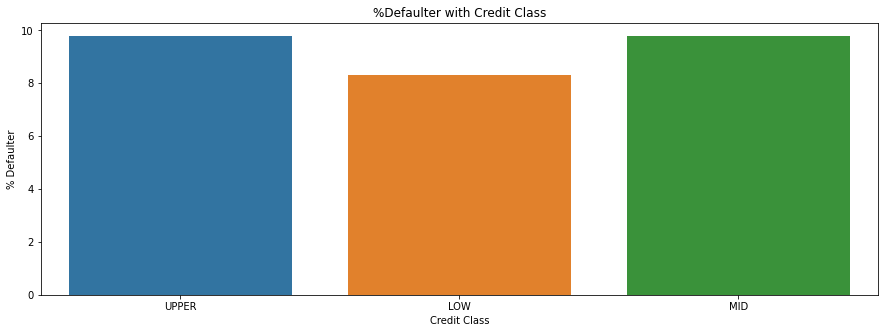

In [483]:
#Credit Score vs Target plot
plt.figure(figsize=(15,5))
plot_data=curr_appl[['CREDIT_CLASS','TARGET']].groupby(['CREDIT_CLASS'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
sns.barplot(x='CREDIT_CLASS',y='TARGET',data=plot_data)
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
sns.barplot(x='CREDIT_CLASS',y='TARGET',data=plot_data)
plt.title('%Defaulter with Credit Class')
plt.xlabel('Credit Class')
plt.ylabel('% Defaulter')
plt.show()

###### We can see that both Upper and Mid Credit Class have higher risk to be defaulter

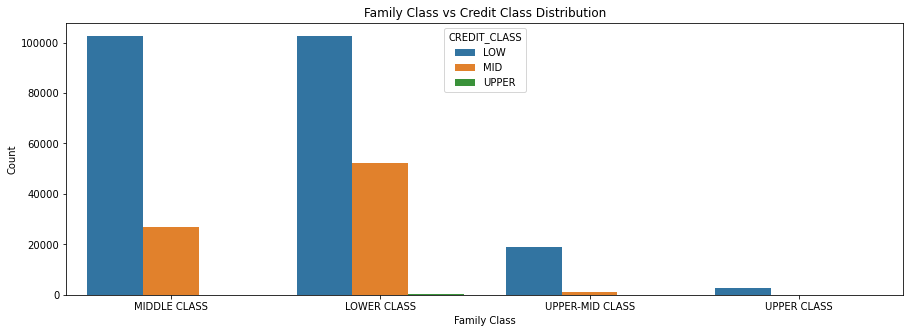

In [484]:
plt.figure(figsize=(15,5))
sns.countplot(data=curr_appl,x='PEOPLE_CLASS',hue='CREDIT_CLASS')
plt.ylabel('Count')
plt.xlabel('Family Class')
plt.title('Family Class vs Credit Class Distribution')
plt.show()

###### Across all the Family Class , max people have CreditClass of Low (<=5%)

In [485]:
#Function for splitting age in different groups
def age_range(x):
    if(x <=20):
        return ("<20")
    elif (x <= 35 and x > 20):
        return ("20-35")
    elif (x <= 55 and x > 35):
        return ("35-55")
    else:
        return ("55+")

In [486]:
#Applying function
curr_appl['AGE_GROUP']=curr_appl["DAYS_BIRTH"].apply(age_range)

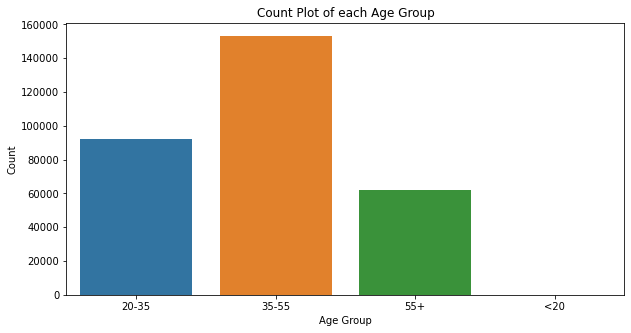

In [487]:
plt.figure(figsize=(10,5))
sns.countplot(data=curr_appl,x='AGE_GROUP')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count Plot of each Age Group')
plt.show()

###### People of age group (35-55) are one applying for loan the most

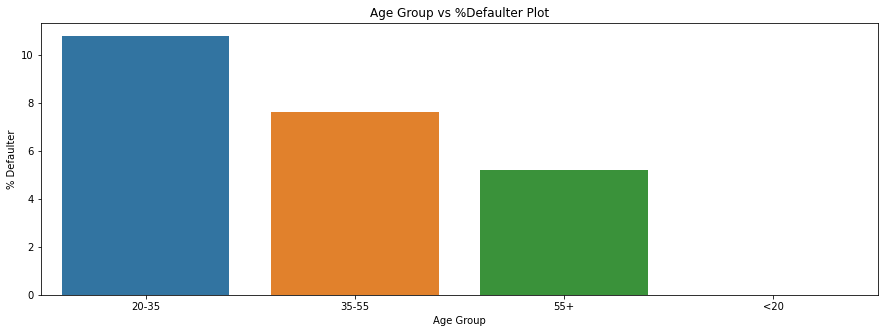

In [488]:
plt.figure(figsize=(15,5))
plot_data=curr_appl[['AGE_GROUP','TARGET']].groupby(['AGE_GROUP'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
sns.barplot(x='AGE_GROUP',y='TARGET',data=plot_data)
plt.xlabel('Age Group')
plt.ylabel('% Defaulter')
plt.title('Age Group vs %Defaulter Plot')
plt.show()

###### Age Group 20-35 have higher chance to become defaulter

In [489]:
#Function for distributing the Years of Experience  
def experience(x):
    if(x <=5):
        return ("Fresher")
    elif x <= 15 and x > 5:
        return ("Experienced")
    else:
        return ("Veteran")

In [490]:
#Applying Function
curr_appl['EXP_GROUP']=curr_appl["DAYS_EMPLOYED"].apply(experience)

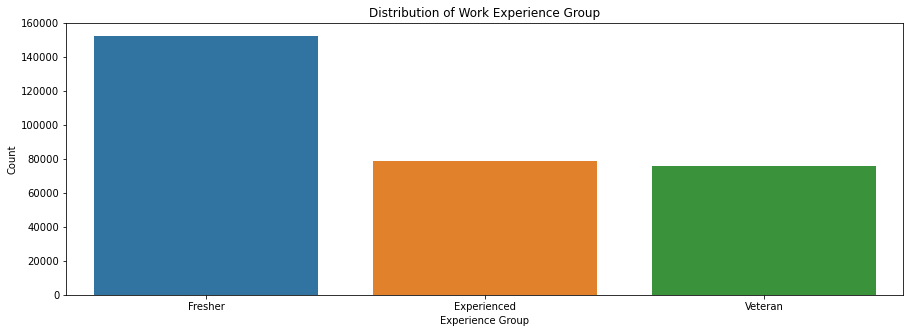

In [491]:
#Count Plot
plt.figure(figsize=(15,5))
sns.countplot(data=curr_appl,x='EXP_GROUP')
plt.xlabel('Experience Group')
plt.ylabel('Count')
plt.title('Distribution of Work Experience Group')
plt.show()

###### We can see Freshers are the one mostly applying for loans

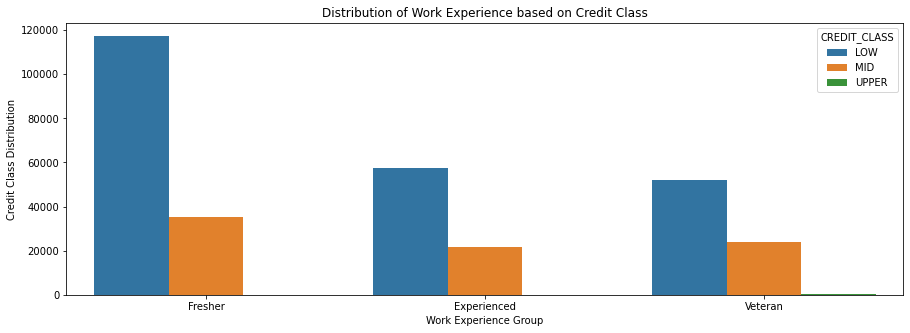

In [492]:
plt.figure(figsize=(15,5))
sns.countplot(data=curr_appl,x='EXP_GROUP',hue='CREDIT_CLASS')
plt.xlabel('Work Experience Group')
plt.ylabel('Credit Class Distribution')
plt.title('Distribution of Work Experience based on Credit Class')
plt.show()

###### We can observe as work experience is increased people tend to take more Upper Credit Class

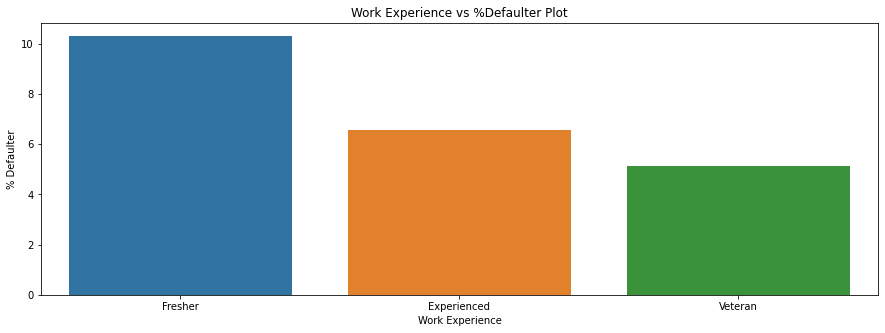

In [493]:
plt.figure(figsize=(15,5))
plot_data=curr_appl[['EXP_GROUP','TARGET']].groupby(['EXP_GROUP'],as_index=False).mean()
plot_data.TARGET=plot_data.TARGET*100
plot_data.sort_values(by='TARGET', ascending=False, inplace=True)
sns.barplot(x='EXP_GROUP',y='TARGET',data=plot_data)
plt.xlabel('Work Experience')
plt.ylabel('% Defaulter')
plt.title('Work Experience vs %Defaulter Plot')
plt.show()

###### Freshers are more tend to be defaulter

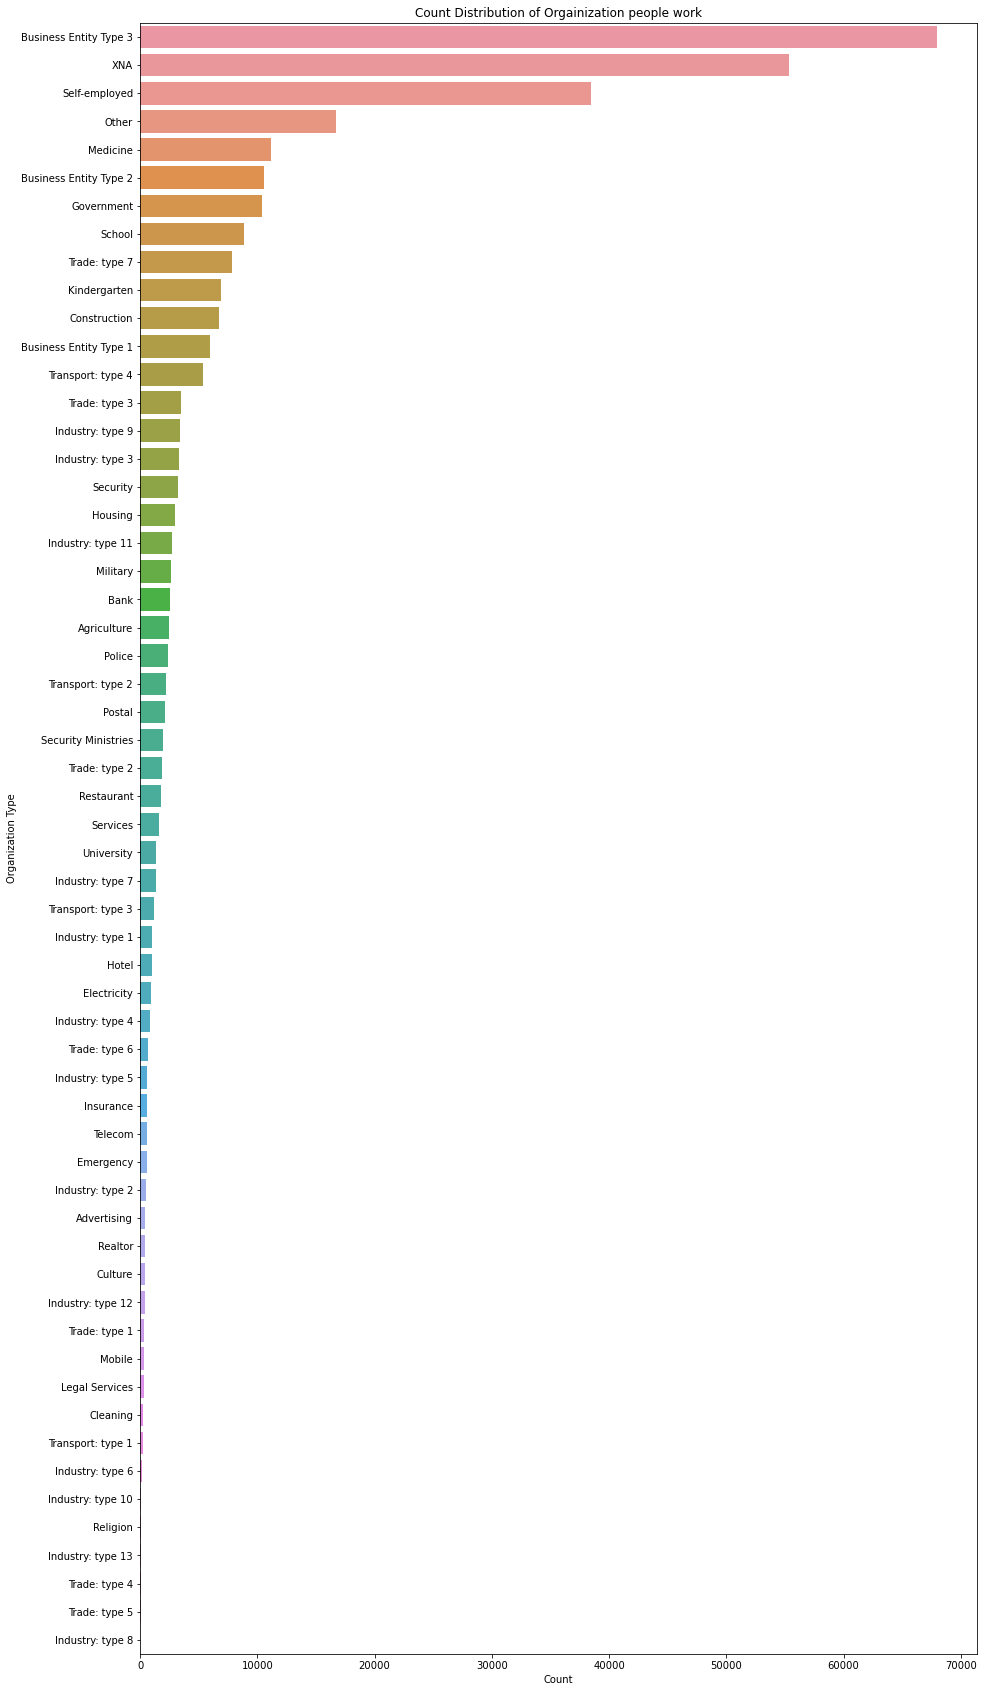

In [494]:
#Count plot for Organizational
plt.figure(figsize=(15,30))
sns.countplot(data=curr_appl,y='ORGANIZATION_TYPE',order=curr_appl['ORGANIZATION_TYPE'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Organization Type')
plt.title("Count Distribution of Orgainization people work")
plt.show()

###### Top 3 industries were pople work and are applying for loan are Business Entity Type 3 followed by Unknown and Self Employed

<AxesSubplot:>

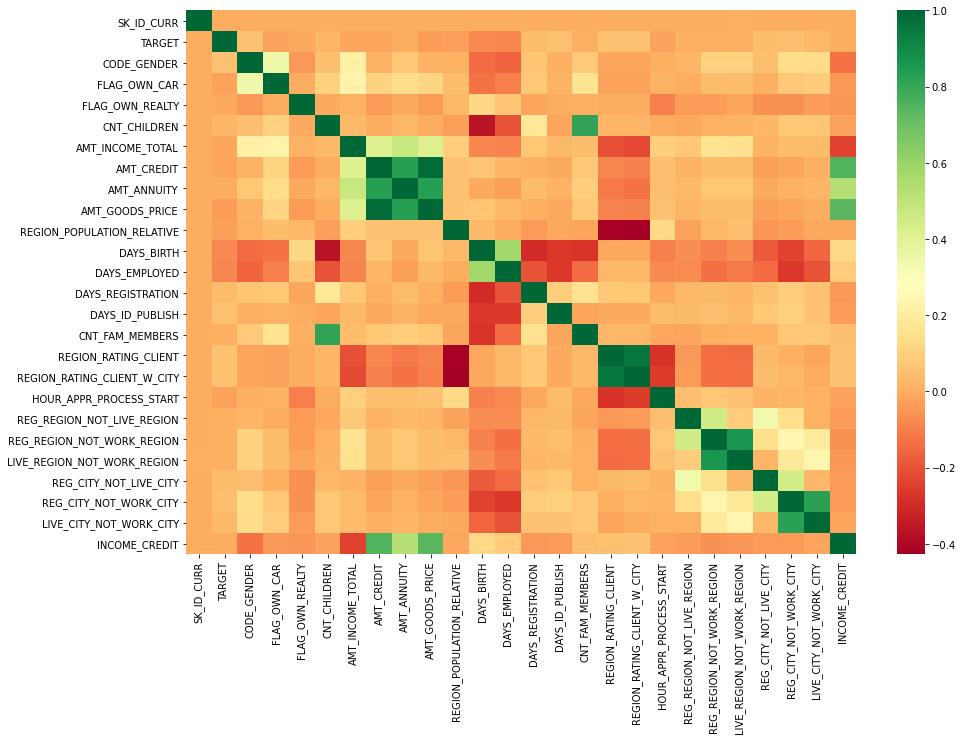

In [495]:
#Now we will plot the correlation of different labels and observe some trends
plt.figure(figsize=(15, 10))
data=curr_appl.corr(method='spearman')
sns.heatmap(data, cmap="RdYlGn",annot=False)

###### AMT_CREDIT , AMT_ANNUITY and AMT_GOODS_PRICE are highly correlated to each other which signifies more the Good Price more will be the Credit .
###### INCOME_TOTAL is moderately correlated with AMT_CREDIT and AMT_GOOD_PRICE which is also expected
###### Many of data are not that much correlated 

### Previous Application

In [496]:
#read the data
prev_appl.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [497]:
#Getting the shape of data
prev_appl.shape

(1670214, 37)

In [498]:
#Getting info about the data
prev_appl.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [499]:
#Calculating Null Values
null_calc=(prev_appl.isnull().sum()/len(prev_appl)*100).sort_values(ascending=False)
null_calc.head(10)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
dtype: float64

###### Some of the data have 99% of Null values which should be dropped and also we will follow same way and delete column values where Null Value is >30%

In [500]:
#Dropping the columns
drop_col=[]
drop_col.append(null_calc[null_calc>=30].index)
print("Number of columns to be dropped is :",len(drop_col[0]))
print(drop_col)

Number of columns to be dropped is : 11
[Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object')]


In [501]:
#Dropping values
prev_appl.drop(labels=drop_col[0],axis=1,inplace=True)

In [502]:
#Checking Null Values
null_calc=(prev_appl.isnull().sum()/len(prev_appl)*100).sort_values(ascending=False)
null_calc.head(10)

AMT_GOODS_PRICE         23.081773
AMT_ANNUITY             22.286665
CNT_PAYMENT             22.286366
PRODUCT_COMBINATION      0.020716
AMT_CREDIT               0.000060
CODE_REJECT_REASON       0.000000
NAME_YIELD_GROUP         0.000000
NAME_SELLER_INDUSTRY     0.000000
SELLERPLACE_AREA         0.000000
CHANNEL_TYPE             0.000000
dtype: float64

In [503]:
#We will filter data which have missing the Good Price info as it is major info for this dataset
filtered_prev_appl = prev_appl[prev_appl['AMT_GOODS_PRICE'].notnull()]

There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.

In [504]:
#Checking columns having XNA and XAP data
columns=filtered_prev_appl.columns
for i in columns:
    if(len(filtered_prev_appl[filtered_prev_appl[i] == 'XNA']!=0)):
       print("In column " ,i," value of XNA is :",len(filtered_prev_appl[filtered_prev_appl[i] == 'XNA']))
    if(len(filtered_prev_appl[filtered_prev_appl[i] == 'XAP']!=0)):
       print("In column " ,i," value of XAP is :",len(filtered_prev_appl[filtered_prev_appl[i] == 'XAP']))

In column  NAME_CASH_LOAN_PURPOSE  value of XNA is : 393941
In column  NAME_CASH_LOAN_PURPOSE  value of XAP is : 821123
In column  NAME_PAYMENT_TYPE  value of XNA is : 241869
In column  CODE_REJECT_REASON  value of XNA is : 4096
In column  CODE_REJECT_REASON  value of XAP is : 1004687
In column  NAME_CLIENT_TYPE  value of XNA is : 936
In column  NAME_GOODS_CATEGORY  value of XNA is : 565294
In column  NAME_PORTFOLIO  value of XNA is : 38375
In column  NAME_PRODUCT_TYPE  value of XNA is : 729811
In column  NAME_SELLER_INDUSTRY  value of XNA is : 487300
In column  NAME_YIELD_GROUP  value of XNA is : 131700


In [505]:
# Removing the column values of 'XNA' and 'XAP' in Cash Loan Purpose
filtered_prev_appl.drop(filtered_prev_appl.loc[filtered_prev_appl['NAME_CASH_LOAN_PURPOSE']=='XNA'].index, inplace=True)
filtered_prev_appl.drop(filtered_prev_appl.loc[filtered_prev_appl['NAME_CASH_LOAN_PURPOSE']=='XAP'].index, inplace=True)

In [506]:
filtered_prev_appl.shape

(69635, 26)

In [507]:
filtered_prev_appl.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                    263
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                    263
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION              0
dtype: int64

In [508]:
#Filling NA Values
value=(curr_appl['AMT_ANNUITY'].mean())
value_cnt=(filtered_prev_appl['CNT_PAYMENT'].mean())
filtered_prev_appl['AMT_ANNUITY']=filtered_prev_appl['AMT_ANNUITY'].fillna(value)
filtered_prev_appl['CNT_FAM_MEMBERS']=filtered_prev_appl['CNT_PAYMENT'].fillna(value_cnt)

In [509]:
filtered_prev_appl.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,CNT_FAM_MEMBERS
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,24.0
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,18.0


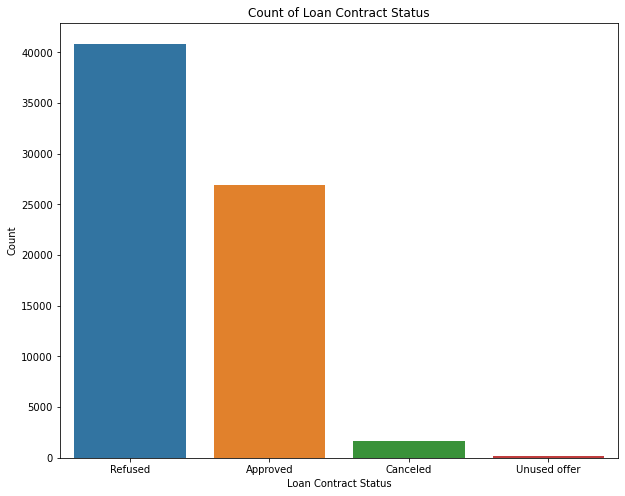

In [510]:
plt.figure(figsize=(10,8))
sns.countplot(data=filtered_prev_appl,x='NAME_CONTRACT_STATUS')
plt.xlabel('Loan Contract Status')
plt.ylabel('Count')
plt.title('Count of Loan Contract Status')
plt.show()

###### Maximum of Loan Contract Status is Refused and very few are Cancelled or Unused

In [511]:
#Approved dataset
approved=filtered_prev_appl[filtered_prev_appl['NAME_CONTRACT_STATUS']=='Approved']
approved.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,CNT_FAM_MEMBERS
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,18.0
51,2664403,163660,Cash loans,9804.285,67500.0,82611.0,67500.0,SATURDAY,10,Y,1,Car repairs,Approved,-766,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high,12.0


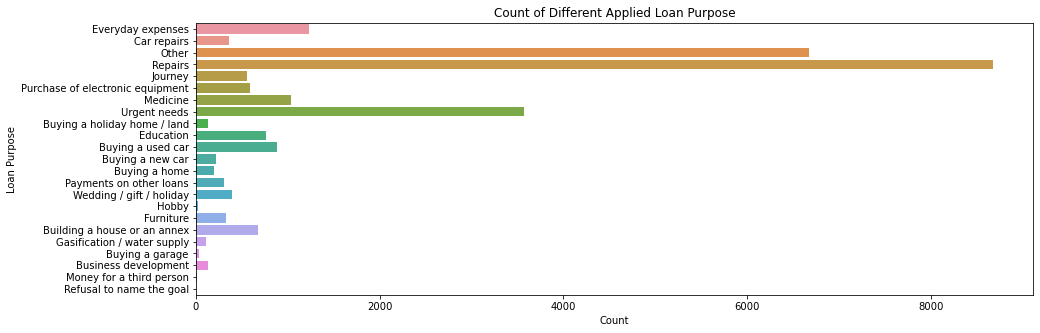

In [512]:
plt.figure(figsize=(15,5))
sns.countplot(data=approved,y='NAME_CASH_LOAN_PURPOSE')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.title('Count of Different Applied Loan Purpose')
plt.show()

###### Maximum of Approved Loan Purpose is for Repairs

In [513]:
#Refused Dataset
refused=filtered_prev_appl[filtered_prev_appl['NAME_CONTRACT_STATUS']=='Refused']
refused.head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,CNT_FAM_MEMBERS
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,24.0
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,45000.0,SATURDAY,16,Y,1,Everyday expenses,Refused,-584,XNA,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0,high,Cash Street: high,18.0


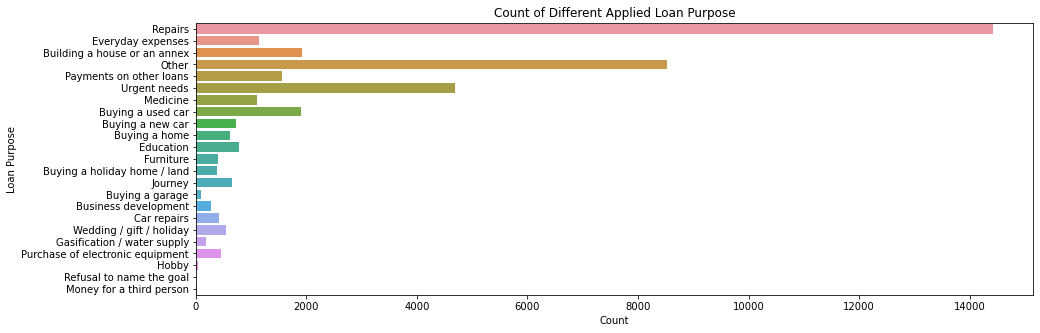

In [514]:
plt.figure(figsize=(15,5))
sns.countplot(data=refused,y='NAME_CASH_LOAN_PURPOSE')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.title('Count of Different Applied Loan Purpose')
plt.show()
plt.show()

###### Similarly Repairs are the one being mostly rejected

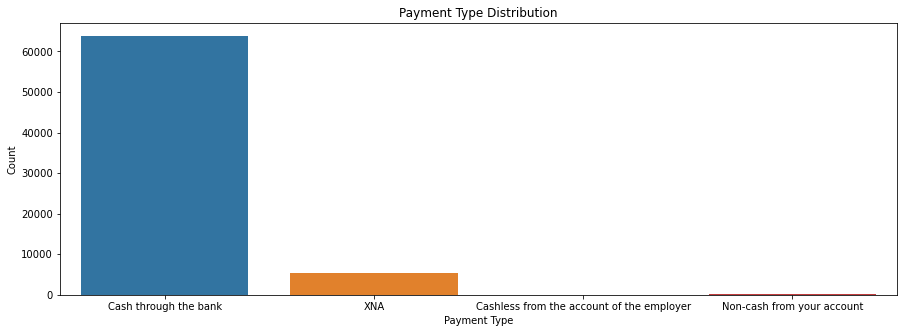

In [515]:
#Payment type analysis
plt.figure(figsize=(15,5))
sns.countplot(data=filtered_prev_appl,x='NAME_PAYMENT_TYPE')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

###### Maximum are paying though Cash in the Bank

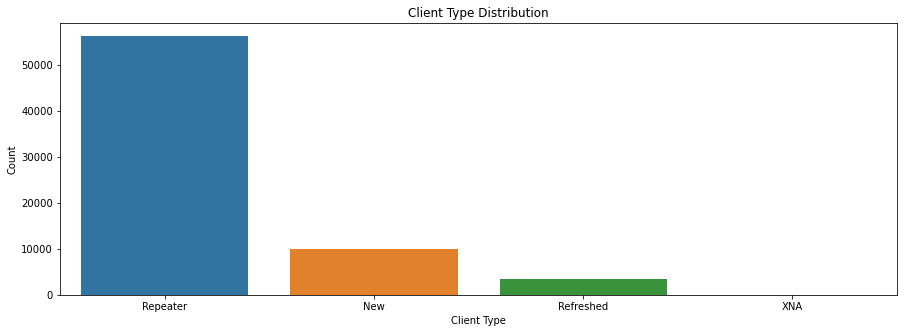

In [516]:
plt.figure(figsize=(15,5))
sns.countplot(data=filtered_prev_appl,x='NAME_CLIENT_TYPE')
plt.title('Client Type Distribution')
plt.xlabel('Client Type')
plt.ylabel('Count')
plt.show()

###### Repeater are the one applying for loan mostly

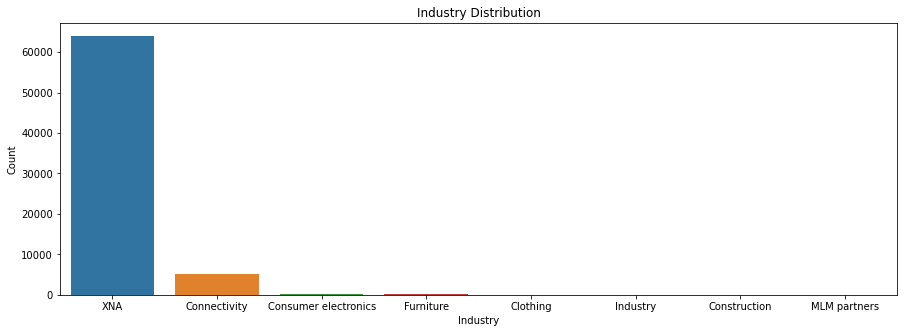

In [517]:
plt.figure(figsize=(15,5))
sns.countplot(data=filtered_prev_appl,x='NAME_SELLER_INDUSTRY')
plt.title('Industry Distribution')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

###### For Maximum Industry is unkonwn after that Connectivity is the major Industry applying for loan

### Merged Data Analysis

In [518]:
#merging dataset for further analysis
merged_data=pd.merge(left=curr_appl,right=filtered_prev_appl,how='inner',on='SK_ID_CURR')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS_x,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,PEOPLE_CLASS,INCOME_CREDIT,CREDIT_CLASS,AGE_GROUP,EXP_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,CNT_FAM_MEMBERS_y
0,100034,0,Revolving loans,1,0,1,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28,2,-4799.0,-3015,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,LOWER CLASS,2.000000,LOW,20-35,Fresher,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,6.0
1,100035,0,Cash loans,0,0,1,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,41,7,-5266.0,-3787,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,MIDDLE CLASS,2.276554,LOW,35-55,Experienced,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,60.0
2,100039,0,Cash loans,1,1,0,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32,5,-3557.0,-3557,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,UPPER-MID CLASS,2.036987,LOW,20-35,Fresher,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,42.0
3,100046,0,Revolving loans,1,1,1,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44,4,-8236.0,-4292,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,MIDDLE CLASS,3.000000,LOW,35-55,Fresher,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,18.0
4,100046,0,Revolving loans,1,1,1,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44,4,-8236.0,-4292,2.0,2,2,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,MIDDLE CLASS,3.000000,LOW,35-55,Fresher,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low,24.0


In [519]:
merged_data.shape

(59413, 64)

In [520]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    59413 non-null  int64  
 1   TARGET                        59413 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          59413 non-null  object 
 3   CODE_GENDER                   59413 non-null  int64  
 4   FLAG_OWN_CAR                  59413 non-null  int64  
 5   FLAG_OWN_REALTY               59413 non-null  int64  
 6   CNT_CHILDREN                  59413 non-null  int64  
 7   AMT_INCOME_TOTAL              59413 non-null  float64
 8   AMT_CREDIT_x                  59413 non-null  float64
 9   AMT_ANNUITY_x                 59413 non-null  float64
 10  AMT_GOODS_PRICE_x             59413 non-null  float64
 11  NAME_TYPE_SUITE               59413 non-null  object 
 12  NAME_INCOME_TYPE              59413 non-null  object 
 13  N

In [521]:
merged_data.describe()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS_x,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,INCOME_CREDIT,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,CNT_FAM_MEMBERS_y
count,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,5.941300e+04,5.941300e+04,59413.000000,5.941300e+04,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,5.941300e+04,59413.000000,5.941300e+04,5.941300e+04,5.941300e+04,59413.000000,59413.000000,59413.000000,59413.000000,59179.000000,59413.000000
mean,278525.178968,0.130258,0.346456,0.351691,0.735344,0.411290,1.821284e+05,5.598321e+05,26868.441368,5.009684e+05,0.020987,43.208675,139.535926,-4639.411713,-2943.405349,2.163584,2.048323,2.026543,11.980728,0.012994,0.048154,0.038510,0.080336,0.245384,0.190245,3.404831,1.935293e+06,25690.294970,4.519988e+05,5.079813e+05,4.519988e+05,12.175147,0.999108,-631.822833,9.513675,29.555552,29.555888
std,103156.294018,0.336590,0.475845,0.477502,0.441154,0.724574,9.810533e+04,3.669192e+05,13611.963059,3.385365e+05,0.013295,11.260179,339.302220,3475.761400,1494.329186,0.902982,0.484984,0.476421,3.248020,0.113248,0.214094,0.192426,0.271815,0.430318,0.392497,2.347568,5.301690e+05,17366.672438,4.943563e+05,5.396833e+05,4.943563e+05,3.216941,0.029854,526.999047,131.046191,17.660545,17.625733
min,100034.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,2.000000e+00,0.000533,21.000000,0.000000,-20838.000000,-6232.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076190,1.000125e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2406.000000,-1.000000,5.000000,5.000000
25%,188958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16911.000000,2.295000e+05,0.010147,34.000000,2.000000,-6972.000000,-4240.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.818182,1.479931e+06,13608.045000,1.350000e+05,1.528200e+05,1.350000e+05,10.000000,1.000000,-686.000000,-1.000000,12.000000,12.000000
50%,279660.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.575000e+05,4.856400e+05,24948.000000,4.500000e+05,0.019101,42.000000,5.000000,-4151.000000,-3132.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.857143,1.941703e+06,21389.895000,2.475000e+05,3.049245e+05,2.475000e+05,12.000000,1.000000,-490.000000,-1.000000,24.000000,24.000000
75%,368445.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.250000e+05,7.551900e+05,34168.500000,6.750000e+05,0.026392,53.000000,11.000000,-1633.000000,-1722.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.369600,2.390904e+06,32598.000000,5.850000e+05,6.750000e+05,5.850000e+05,15.000000,1.000000,-305.000000,0.000000,48.000000,48.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.214117e+06,3.150000e+06,215500.500000,3.150000e+06,0.072508,68.000000,1000.000000,0.000000,0.000000,12.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.736842,2.845265e+06,418058.145000,4.050000e+06,4.104351e+06,4.050000e+06,23.000000,1.000000,-2.000000,12102.000000,60.000000,60.000000


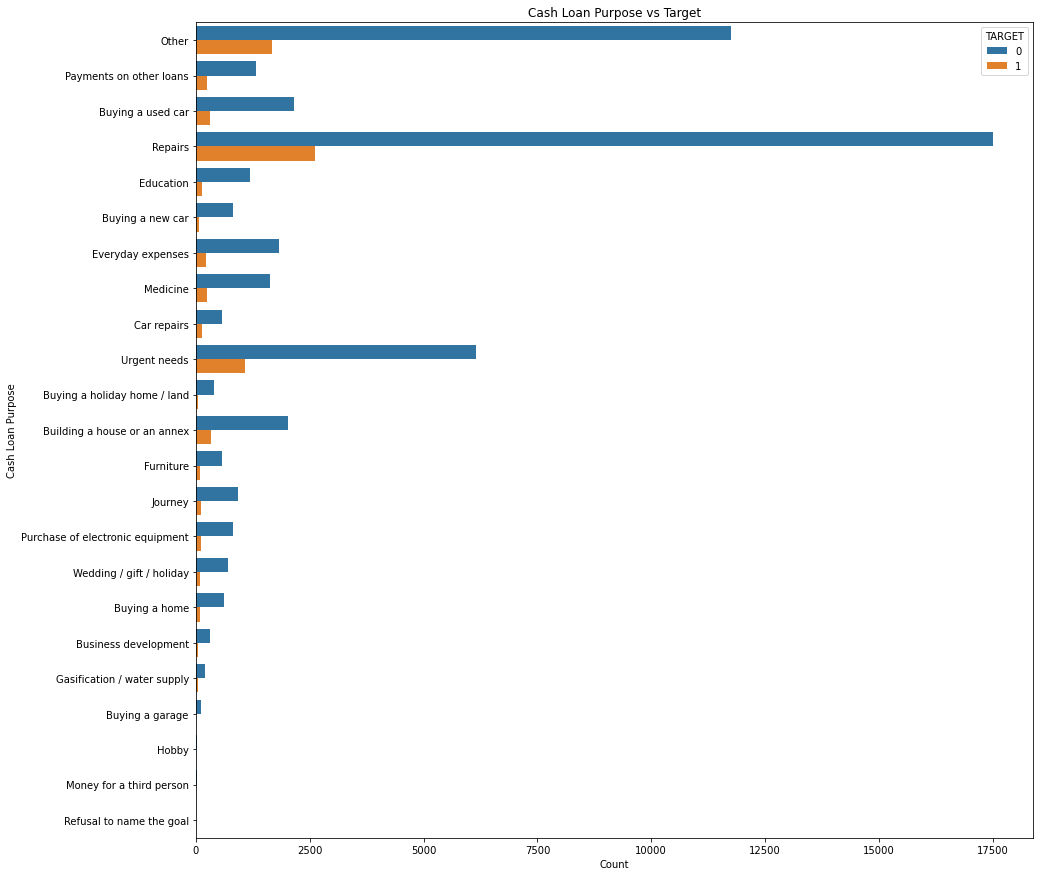

In [522]:
plt.figure(figsize=(15,15))
sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE',hue = 'TARGET')
plt.ylabel('Cash Loan Purpose')
plt.xlabel('Count')
plt.title('Cash Loan Purpose vs Target')
plt.show()

###### We can see repair is the higher count of Paying timely and Defaulter

## Cases when the Loan will be repayed in time :

####  Females are less tending to be default.
####  Car Owner have high chance to repay in time.
####  People with less income tends to default mostly.
####  Student and Businessmen tend to repay in time.
####  Academic degree has less defaults.
####  Senior Citizens are less likely to be defaulter.
####  For Repair the loan is applied mostly and repayed also mostly. 